<a href="https://colab.research.google.com/github/muhammad-usama-aleem/image-segmentation/blob/main/Image%20segmentation%20using%20Unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **loading dataset**

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/dataset1.zip

In [4]:
from google.colab import drive
drive.flush_and_unmount()

# **Initialize the model**

In [6]:
! pip install git+https://github.com/divamgupta/image-segmentation-keras

  Cloning https://github.com/divamgupta/image-segmentation-keras to /tmp/pip-req-build-d1ewl71y
  Running command git clone -q https://github.com/divamgupta/image-segmentation-keras /tmp/pip-req-build-d1ewl71y


In [7]:
!git clone https://github.com/divamgupta/image-segmentation-keras

Cloning into 'image-segmentation-keras'...
remote: Enumerating objects: 1160, done.
remote: Total 1160 (delta 0), reused 0 (delta 0), pack-reused 1160
Receiving objects: 100% (1160/1160), 3.29 MiB | 29.03 MiB/s, done.
Resolving deltas: 100% (747/747), done.


In [8]:
%cd /content/image-segmentation-keras

/content/image-segmentation-keras


In [27]:
import os
print(os.getcwd())


from keras_segmentation.models.unet import vgg_unet, unet

model = unet(n_classes=12 ,  input_height=320, input_width=640  )

/content/image-segmentation-keras


# **model training**

In [11]:
model.train(
    train_images =  "/content/dataset1/images_prepped_train/",
    train_annotations = "/content/dataset1/annotations_prepped_train/",
    checkpoints_path = "/content/vgg_unet_1" , 
    epochs=5, 
    batch_size=1,
)

Verifying training dataset


100%|██████████| 367/367 [00:02<00:00, 160.54it/s]


Dataset verified! 
Epoch 1/5
512/512 [==============================] - ETA: 0s - loss: 0.9264 - accuracy: 0.7079
Epoch 1: saving model to /content/vgg_unet_1.00001
512/512 [==============================] - 91s 153ms/step - loss: 0.9264 - accuracy: 0.7079
Epoch 2/5
512/512 [==============================] - ETA: 0s - loss: 0.6863 - accuracy: 0.7829
Epoch 2: saving model to /content/vgg_unet_1.00002
512/512 [==============================] - 78s 153ms/step - loss: 0.6863 - accuracy: 0.7829
Epoch 3/5
512/512 [==============================] - ETA: 0s - loss: 0.5760 - accuracy: 0.8187
Epoch 3: saving model to /content/vgg_unet_1.00003
512/512 [==============================] - 78s 153ms/step - loss: 0.5760 - accuracy: 0.8187
Epoch 4/5
512/512 [==============================] - ETA: 0s - loss: 0.5090 - accuracy: 0.8374
Epoch 4: saving model to /content/vgg_unet_1.00004
512/512 [==============================] - 78s 153ms/step - loss: 0.5090 - accuracy: 0.8374
Epoch 5/5
512/512 [==========

In [19]:
out = model.predict_segmentation(
    inp="/content/dataset1/images_prepped_test/0016E5_08133.png",
    out_fname="/tmp/out.png"
)

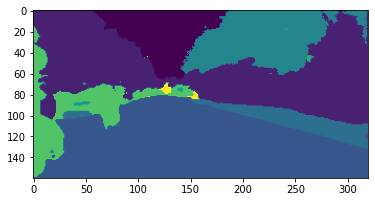

In [20]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


plt.imshow(out)

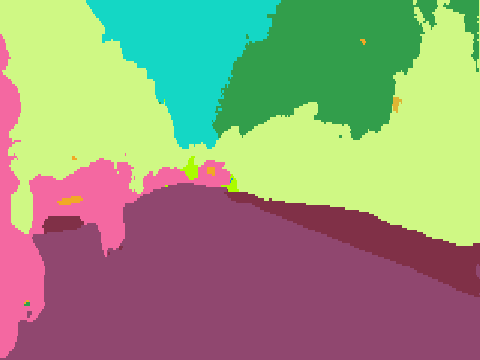

In [21]:
from IPython.display import Image
Image('/tmp/out.png')

In [24]:
o = model.predict_segmentation(
    inp="/content/dataset1/images_prepped_test/0016E5_08133.png",
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

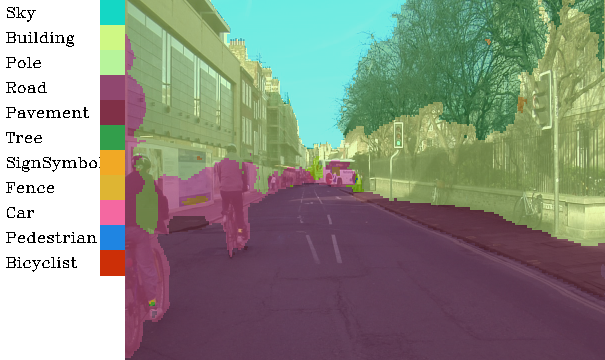

In [25]:
from IPython.display import Image
Image('/tmp/out.png')